# Estimating Obesity: A Study of Eating Habits and Physical Condition

Name: Caterina Gallo, Sophia Mares, William Acuna

Date: 02/27/23

In [1]:
# Libraries to be used

#from numpy import random
import math
#import statistics
#import scipy.integrate as spi
#from scipy.stats import binom
#from scipy.stats import norm
#from scipy.stats import gamma
#from scipy.stats import t
#from statsmodels.stats.proportion import proportion_confint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy import stats
import scipy.stats
from scipy.stats import beta
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.graphics.mosaicplot import mosaic

## Data Cleaning and Preparation

In this section, we access the datafile and save the variables. For each subject the body mass index is calculated and the obesity level is evaluated. 

In [2]:
dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv') # access and read data file 
gender = dataset['Gender'] # gender: Female or Male
age = dataset['Age'] # age [years]
height = dataset['Height'] # height [m]
weight = dataset['Weight'] # weight [kg]

# Eating habits attributes 
FAVC = dataset['FAVC'] # frequent consumption of high caloric food: yes or no
FCVC = dataset['FCVC'] # frequent consumption of vegetables: never, sometimes, always
NCP = dataset['NCP'] # number of main meals: from 1 to 4
CAEC = dataset['CAEC'] # consumption of food between meals: no, sometimes, frequently, always
CH2O = dataset['CH2O'] # consumption of daily water: from 1 to 3 [l]
CALC = dataset['CALC'] # consumption of alcohol: no, sometimes, frequently, always

# Physical condition attributes
SCC = dataset['SCC'] # calories consumption monitoring: yes or no
FAF = dataset['FAF'] # physical activity frequency: from 0 to 5 days per week
TUE = dataset['TUE'] # time using technology: from 0 to 5 hours per day
MTRANS = dataset['MTRANS'] # transportation used: automobile, motorbike, bike, public transport, walking

# Other 
family_overweight = dataset['family_history_with_overweight'] # family history with overweight: yes or no
SMOKE = dataset['SMOKE'] # 

# Calculation of the body mass index and obesity level classification 
BMI = weight / np.power(height, 2) # body mass index [kg/m^2]
obesitylevel = np.empty(len(BMI)) # Underweight: 0, Normal: 1, Overweight: 2, Obesity I: 3, Obesity II: 4, Obesity III: 5. 
for jj in range(len(BMI)): 
    if BMI[jj] < 18.5:
        obesitylevel[jj] = 0
    if BMI[jj] >= 18.5 and BMI[jj] < 24.9:
        obesitylevel[jj] = 1
    if BMI[jj] >= 24.9 and BMI[jj] < 29.9:
        obesitylevel[jj] = 2
    if BMI[jj] >= 29.9 and BMI[jj] < 34.9:
        obesitylevel[jj] = 3
    if BMI[jj] >= 34.9 and BMI[jj] < 39.9:
        obesitylevel[jj] = 4
    if BMI[jj] >= 39.9:
        obesitylevel[jj] = 5
        
NObeyesdad = dataset['NObeyesdad'] # obesity level as saved in the dataset

## Exploratory Data Analysis

Descriptive statistics is shown below. Recorded data are analyzed through stacked barplots and hystograms. 

There are 1043 females and 1068 males.


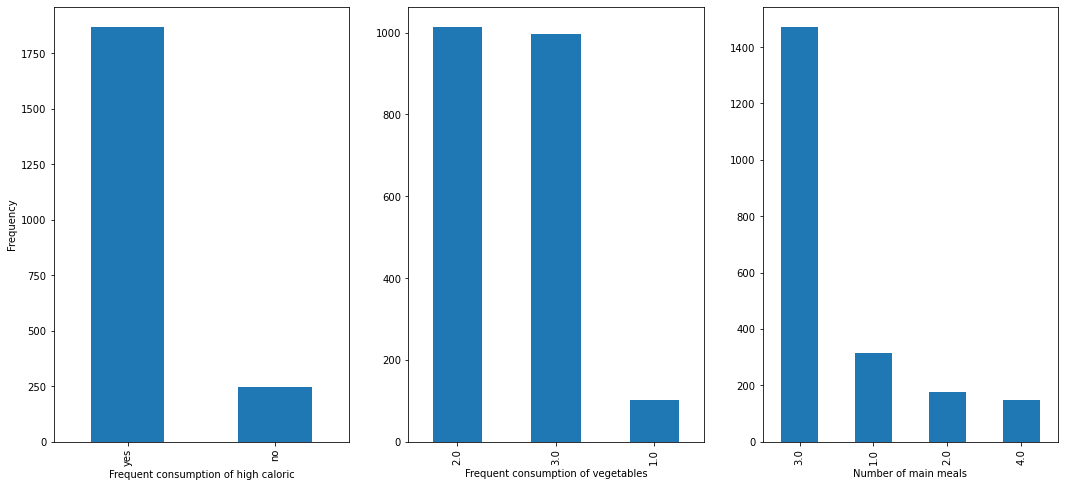

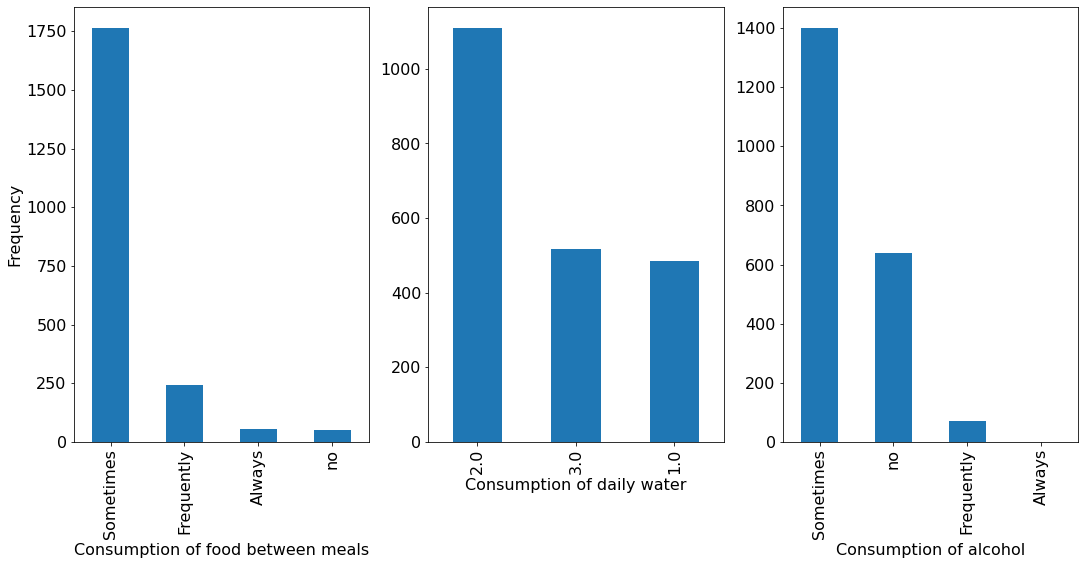

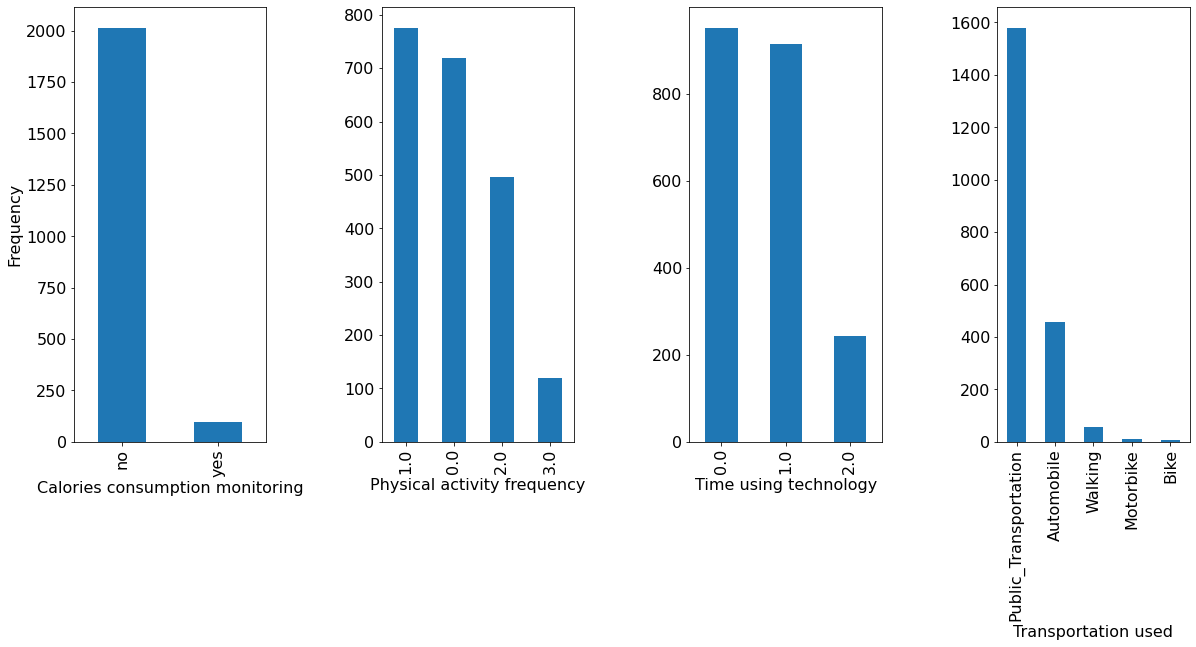

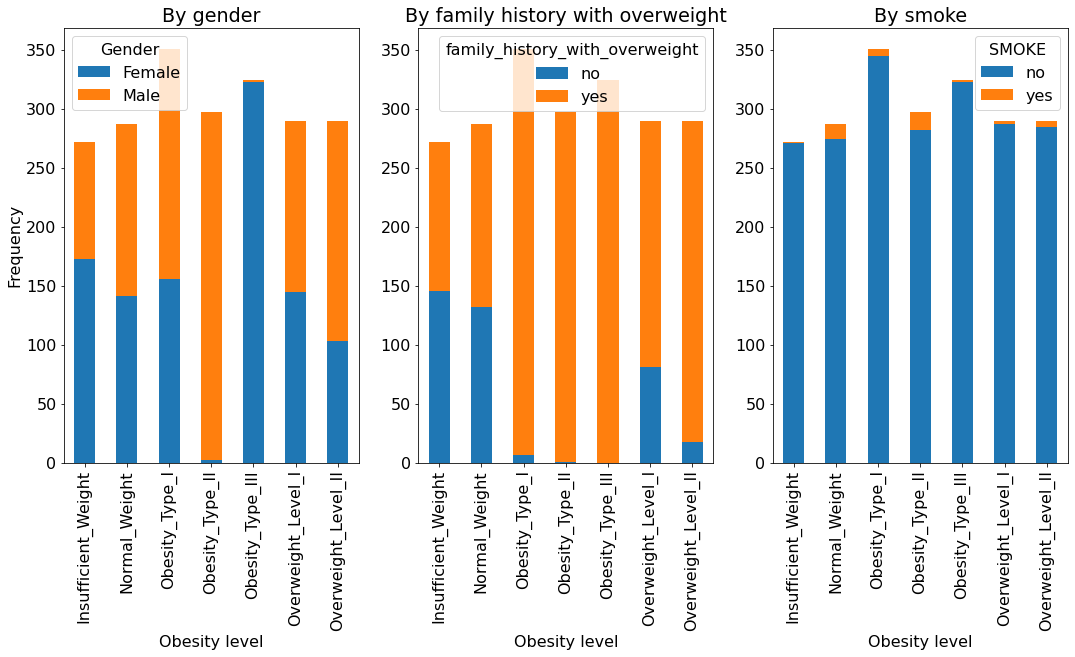

In [3]:
count_f = 0 # number of females
for jj in range(len(gender)):
    if gender[jj] == 'Female': 
        count_f = count_f + 1
count_m = len(gender) - count_f # number of males 
print('There are', count_f, 'females and', count_m, 'males.')

age_f = age.loc[dataset['Gender'] == 'Female'] # ages of females
age_m = age.loc[dataset['Gender'] == 'Male'] # ages of males
weight_f = weight.loc[dataset['Gender'] == 'Female'] # weights of females
weight_m = weight.loc[dataset['Gender'] == 'Male'] # weights of males
height_f = height.loc[dataset['Gender'] == 'Female'] # heights of females
height_m = height.loc[dataset['Gender'] == 'Male'] # heights of males
BMI_f = weight_f / np.power(height_f, 2) # BMI for females
BMI_m = weight_m / np.power(height_m, 2) # BMI for males

# Sample size, mean, standard deviation, and five number summary for age, weight, height variables for females 
summary_agef = age_f.describe() 
# print('Summary age for females \n', round(summary_agef, 2))
summary_weightf = weight_f.describe() 
# print('Summary weight for females \n', round(summary_weightf, 2))
summary_heightf = height_f.describe() 
# print('Summary height for females \n', round(summary_heightf, 2))
summary_BMIf = BMI_f.describe() 
# print('Summary BMI for females \n', round(summary_BMIf, 2))

# Sample size, mean, standard deviation, and five number summary for age, weight, height variables for males
summary_agem = age_m.describe() 
# print('Summary age for males \n', round(summary_agem, 2))
summary_weightm = weight_m.describe() 
# print('Summary weight for males \n', round(summary_weightm, 2))
summary_heightm = height_m.describe() 
# print('Summary height for males \n', round(summary_heightm, 2))
summary_BMIm = BMI_m.describe() 
# print('Summary BMI for males \n', round(summary_BMIm, 2))

# Visualization of distrubution of each variable 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,8))
plt.rcParams['font.size'] = '16'
FAVC.value_counts().plot(ax = ax1, kind = 'bar', xlabel = 'Frequent consumption of high caloric', ylabel = 'Frequency')
round(FCVC).value_counts().plot(ax = ax2, kind = 'bar', xlabel = 'Frequent consumption of vegetables')
round(NCP).value_counts().plot(ax = ax3, kind = 'bar', xlabel = 'Number of main meals')
# fig.suptitle('Distributions of Eating Habits Attributes - First Part', fontsize = 14)
plt.savefig('Fig1.jpeg', bbox_inches='tight') 
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,8))
plt.rcParams['font.size'] = '16'
CAEC.value_counts().plot(ax = ax1, kind = 'bar', xlabel = 'Consumption of food between meals', ylabel = 'Frequency')
round(CH2O).value_counts().plot(ax = ax2, kind = 'bar', xlabel = 'Consumption of daily water')
CALC.value_counts().plot(ax = ax3, kind = 'bar', xlabel = 'Consumption of alcohol')
# fig.suptitle('Distributions of Eating Habits Attributes - Second Part', fontsize = 14)
plt.savefig('Fig1bis.jpeg', bbox_inches='tight') 
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,8))
plt.rcParams['font.size'] = '16'
SCC.value_counts().plot(ax = ax1, kind = 'bar', xlabel = 'Calories consumption monitoring', ylabel = 'Frequency')
round(FAF).value_counts().plot(ax = ax2, kind = 'bar', xlabel = 'Physical activity frequency')
round(TUE).value_counts().plot(ax = ax3, kind = 'bar', xlabel = 'Time using technology')
MTRANS.value_counts().plot(ax = ax4, kind = 'bar', xlabel = 'Transportation used')
plt.subplots_adjust(wspace = 0.6, hspace = 0.6)
# fig.suptitle('Distributions of Physical Condition Attributes', fontsize = 14)
plt.savefig('Fig2.jpeg', bbox_inches='tight') 
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,8))
dataset.groupby(['NObeyesdad', 'Gender']).size().unstack().plot(ax = ax1, kind = 'bar', stacked = True, xlabel = 'Obesity level', ylabel = 'Frequency', title = 'By gender')
dataset.groupby(['NObeyesdad', 'family_history_with_overweight']).size().unstack().plot(ax = ax2, kind = 'bar', stacked = True, xlabel = 'Obesity level', title = 'By family history with overweight')
dataset.groupby(['NObeyesdad', 'SMOKE']).size().unstack().plot(ax = ax3, kind = 'bar', stacked = True, xlabel = 'Obesity level', title = 'By smoke')
# fig.suptitle('Relationships between obesity level and gender, family history and smoke ', fontsize = 14)
plt.savefig('Fig3.jpeg', bbox_inches='tight') 
plt.show()

In [4]:
"""This block of code gives us a linear regression model,
not the best,
for 
our independent variable NObeyesdad, which is a categorical variable
with 6 categories. It uses every Dependent variable by OneHotEncoding
them and label encoding the 7 categories for the independent variable (0,1,2,3,4,5,6).
This imples a linear relationship between the 7 categories,
'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'"""

df = dataset
#print(df.head())
#print(df.describe())

# Load the dataset
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


# Define the features and target variable
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'CALC', 'MTRANS']
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
target_col = 'NObeyesdad'

# One-hot encode categorical variables
#encoder = OneHotEncoder()
encoder = OneHotEncoder(sparse=False)
#cat_data = encoder.fit_transform(df[cat_cols]).toarray()
cat_data = encoder.fit_transform(df[cat_cols])
cat_cols_encoded = list(encoder.get_feature_names_out(cat_cols))


# Combine categorical and numeric variables
X = pd.concat([pd.DataFrame(cat_data, columns=cat_cols_encoded), df[num_cols]], axis=1)
Y = df[target_col]
#y = Y.replace({})
le = LabelEncoder()
y = le.fit_transform(Y)


target_col_encoded = le.classes_

# Initialize and fit linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Print coefficients
print(lr.coef_)

coefficients = pd.DataFrame({
    'Features': list(X.columns),
    'Coefficients': lr.coef_
})
print(coefficients)
print('\nTarget variable categories: ', list(target_col_encoded))

#df = df.drop('NObeyesdad2', axis=1)


print("\n\nprinting head:\n\n", df.head())

[-0.02306688  0.02306688 -0.39964699  0.39964699  0.33122623 -0.33122623
 -0.60888761 -1.01147696  0.27507377  1.34529079  0.29993984 -0.29993984
 -0.57413805  0.77838878  0.02907187 -0.2333226  -0.09573015 -0.23703671
  0.12639434  0.26757676 -0.06120424  0.05150393 -2.11086355  0.01984999
 -0.13997878 -0.17963863  0.06363729 -0.10576432  0.03260786]
                              Features  Coefficients
0                        Gender_Female     -0.023067
1                          Gender_Male      0.023067
2    family_history_with_overweight_no     -0.399647
3   family_history_with_overweight_yes      0.399647
4                              FAVC_no      0.331226
5                             FAVC_yes     -0.331226
6                          CAEC_Always     -0.608888
7                      CAEC_Frequently     -1.011477
8                       CAEC_Sometimes      0.275074
9                              CAEC_no      1.345291
10                            SMOKE_no      0.299940
11        

In [5]:
"""This block of code gives us a logistic regression model, for 
our independent variable NObeyesdad, which is a categorical variable
with 7 categories. It uses every Dependent variable by OneHotEncoding
them and label encoding the 7 categories for the independent variable (0,1,2,3,4,5,6).
This imples a linear relationship between the 7 categories,
'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'"""

import statsmodels.api as sm
import pandas as pd

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Define the features and target variable
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'CALC', 'MTRANS']
#cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'CALC', 'MTRANS']
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
target_col = 'NObeyesdad'

encoder = OneHotEncoder(sparse=False, drop='first')
cat_data = encoder.fit_transform(df[cat_cols])
cat_cols_encoded = list(encoder.get_feature_names_out(cat_cols))


# Combine categorical and numeric variables
X = pd.concat([pd.DataFrame(cat_data, columns=cat_cols_encoded), df[num_cols]], axis=1)



# Define the features and target variable
label = [0, 1, 2, 3, 4, 5, 6]
y = df['NObeyesdad'].replace(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], label)


# Fit a binomial GLM
model = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial())
result = model.fit()

# Print the model summary
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             NObeyesdad   No. Observations:                 2111
Model:                            GLM   Df Residuals:                     2088
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 22 Feb 2023   Deviance:                   3.6345e+05
Time:                        22:42:13   Pearson chi2:                 7.88e+19
No. Iterations:                     7   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

C:\Users\willa\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\willa\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\willa\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1015: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights
C:\Users\willa\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\willa\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


In [6]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Define the categorical and numerical columns
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'CALC', 'MTRANS']
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
target_col = 'NObeyesdad'

# Encode the categorical variables using one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')
cat_data = encoder.fit_transform(df[cat_cols])
cat_cols_encoded = list(encoder.get_feature_names_out(cat_cols))

# Combine categorical and numeric variables
X = pd.concat([pd.DataFrame(cat_data, columns=cat_cols_encoded), df[num_cols]], axis=1)

# Define the features and target variable
labels = df['NObeyesdad'].unique()
label_dict = {label: i for i, label in enumerate(labels)}
y = df['NObeyesdad'].map(label_dict)

print(y.head())

# Fit a binomial GLM
model = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial())
result = model.fit()

# Print the model summary
print(result.summary())




0    0
1    0
2    0
3    1
4    2
Name: NObeyesdad, dtype: int64
                 Generalized Linear Model Regression Results                  
Dep. Variable:             NObeyesdad   No. Observations:                 2111
Model:                            GLM   Df Residuals:                     2088
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 22 Feb 2023   Deviance:                   3.7965e+05
Time:                        22:42:13   Pearson chi2:                 7.82e+19
No. Iterations:                    12   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

C:\Users\willa\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\willa\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\willa\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1015: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights
C:\Users\willa\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\willa\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


In [7]:
"""
This block builds off of the last one, however to use a binary GLM fit,
logistic regression model,
replaces our indepdent variable categories: 'Insufficient_Weight', 'Normal_Weight', 
'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 
'Obesity_Type_II', 'Obesity_Type_III' with 0,0,1,1,1,1,1 values.
"""
import statsmodels.api as sm
import pandas as pd

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Define the features and target variable
label = [0, 0, 1, 1, 1, 1, 1]
y = df['NObeyesdad'].replace(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], label)

# Fit a binomial GLM
model = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial())
result = model.fit()

# Print the model summary
print(result.summary())

#print("\n\nprinting head:\n\n", df.head())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             NObeyesdad   No. Observations:                 2111
Model:                            GLM   Df Residuals:                     2088
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17.101
Date:                Wed, 22 Feb 2023   Deviance:                       34.203
Time:                        22:42:13   Pearson chi2:                 4.30e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.6801
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

C:\Users\willa\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\willa\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy: 0.9361702127659575
Confusion matrix: [[54  2  0  0  0  0  0]
 [ 6 52  0  0  0  4  0]
 [ 0  0 74  2  0  0  2]
 [ 0  0  3 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  4  0  0  0 52  0]
 [ 0  0  1  0  0  3 46]]
Classification report:                      precision    recall  f1-score   support

Insufficient_Weight       0.90      0.96      0.93        56
      Normal_Weight       0.90      0.84      0.87        62
     Obesity_Type_I       0.95      0.95      0.95        78
    Obesity_Type_II       0.96      0.95      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.88      0.93      0.90        56
Overweight_Level_II       0.96      0.92      0.94        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423



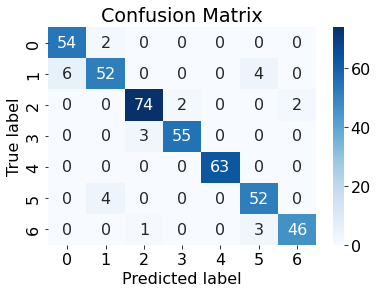

In [8]:
"""
Decision tree for this dataset
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Define the target variable and input features
y = df['NObeyesdad']
X = df.drop('NObeyesdad', axis=1)

# One-hot encode categorical variables
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
enc = OneHotEncoder(sparse=False, drop='first')
X_cat = enc.fit_transform(X[cat_cols])
X_num = X.drop(cat_cols, axis=1)
X = pd.concat([pd.DataFrame(X_cat), X_num], axis=1)

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = dtc.predict(X_test)

# Evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

# add axis labels and title
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")

# show plot
plt.show()

In [9]:
"""
**Work in Progress**

The intent of this block is to run an analysis of variance (ANOVA) model to determine if we should reject the null hypothesis
 and accept the alternate hypothesis, or visa versa. This is an effective way to determine whether there is a difference 
 among the experiement's results. 
"""
import statsmodels.formula.api as smf
# Fit the data for the ANOVA test versus obesity level. 
fit_all = smf.ols(formula = "obesitylevel ~ C(family_history_with_overweight) + C(FAVC) + C(CAEC) + C(SMOKE) + C(CALC) + C(MTRANS) + Age + Weight + FCVC + NCP + CH2O + FAF + TUE", data = dataset).fit()
print(fit_all.summary())

                            OLS Regression Results                            
Dep. Variable:           obesitylevel   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     771.0
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:42:15   Log-Likelihood:                -1671.4
No. Observations:                2111   AIC:                             3385.
Df Residuals:                    2090   BIC:                             3504.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [10]:


# Fit the categorical data for the ANOVA test versus obesity level. 
fit_cat = smf.ols(formula = "obesitylevel ~ C(family_history_with_overweight) + C(FAVC) + C(CAEC) + C(SMOKE) + C(CALC) + C(MTRANS)", data = dataset).fit()
print(fit_cat.summary())



                            OLS Regression Results                            
Dep. Variable:           obesitylevel   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     105.1
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          3.00e-217
Time:                        22:42:15   Log-Likelihood:                -3385.4
No. Observations:                2111   AIC:                             6799.
Df Residuals:                    2097   BIC:                             6878.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [11]:
 # Fit the numerical data for the ANOVA test versus obesity level. 
fit_num = smf.ols(formula = "obesitylevel ~ Age + Weight + FCVC + NCP + CH2O + FAF + TUE", data = dataset).fit()
print(fit_num.summary())

                            OLS Regression Results                            
Dep. Variable:           obesitylevel   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:42:15   Log-Likelihood:                -1783.3
No. Observations:                2111   AIC:                             3583.
Df Residuals:                    2103   BIC:                             3628.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1676      0.099    -21.961      0.0

## Model Selection

## Model Analysis 